# 2.4 Supervised Learning - Classification Models

**1. Split the dataset into training (80%) and testing (20%) sets.**

In [105]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced,      # Features
    y,              # Target
    test_size=0.2,  # 20% test
    random_state=42,
    stratify=y      # maintain class proportion
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (239, 12)
X_test shape: (60, 12)
y_train distribution:
 num
0    129
1    110
Name: count, dtype: int64
y_test distribution:
 num
0    32
1    28
Name: count, dtype: int64


**Training Models**

○ Logistic Regression

○ Decision Tree

○ Random Forest


○ Support Vector Machine (SVM)



In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)

print("✅ All models trained successfully.\n")

✅ All models trained successfully.



**Evaluate Classification Metrics**

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("=== Classification Metrics ===\n")
for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

=== Classification Metrics ===

--- Logistic Regression ---
Accuracy : 0.8333
Precision: 0.8214
Recall   : 0.8214
F1-score : 0.8214
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



--- Decision Tree ---
Accuracy : 0.7167
Precision: 0.7619
Recall   : 0.5714
F1-score : 0.6531
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        32
           1       0.76      0.57      0.65        28

    accuracy                           0.72        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60



--- Random Forest ---
Accuracy : 0.8500
Precision: 0.8800
Recall   : 0

**Evaluate ROC Curve & AUC Score**

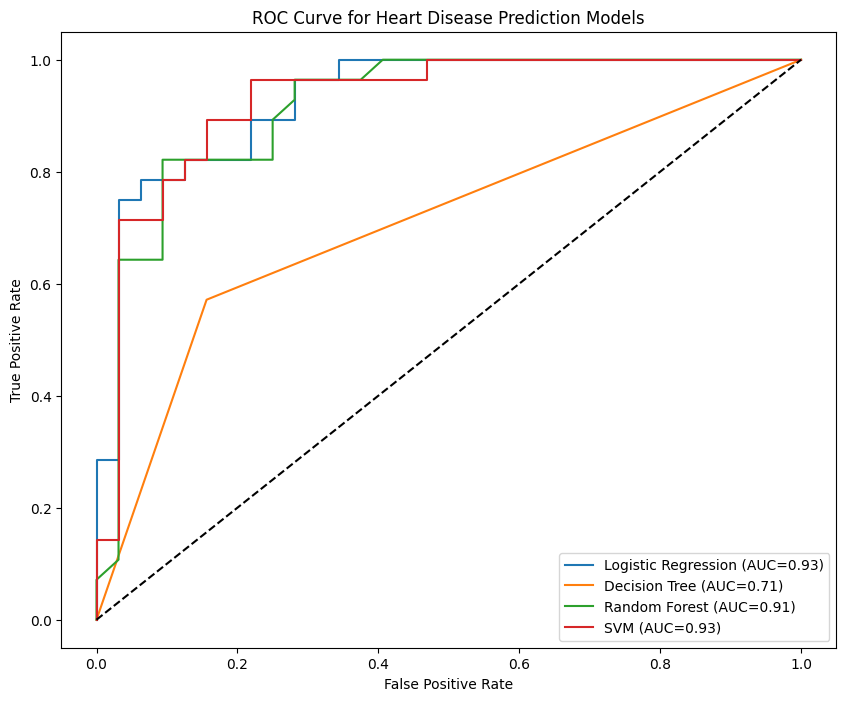

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]  # probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Disease Prediction Models")
plt.legend(loc="lower right")
plt.show()

# 2.5 Unsupervised Learning - Clustering